### Import libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
import sklearn as sk

## Step 1 : Import and cleaning
_______________________________________________________

#### 1.1 Import data (1/4)

In [159]:
data = pd.read_csv('../ML1/arbres_grenoble_epsg4326.csv')

In [160]:
data.head(5)

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [161]:
data.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

In [162]:
#garder la variable initiale 'data' sans aucun changement
arbres_gre = data

#### 1.2 and 1.3. Delete rows with missing values in «année de plantation» and analyss of data structure (3/4)

In [163]:
arbres_gre.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,31736.000000,31736.000000,0.0,30144.000000,0.0,600.000000,0.0,0.0,0.0,0.0
mean,20393.645544,3.826758,NaN,1990.018644,NaN,87.856667,NaN,NaN,NaN,NaN
std,12759.662993,1.718467,NaN,17.992314,NaN,60.657935,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9656.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,19424.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,29254.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,46807.000000,6.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [164]:
# identifying the existence of nan values or non numeric (.info())
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970.,   nan, 1995., 2022., 1993., 1988., 1980.,
       2005., 2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955.,
       1981., 1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012.,
       1992., 1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002.,
       1987., 1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985.,
       1966., 1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016.,
       2018., 2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021.,
       2014., 1900., 1959., 1964.])

In [165]:
# Dropping nan values on the annedeplantation column
# dropping unnecessary columns (checked after when using describe)
arbres_gre = (arbres_gre.dropna(subset='anneedeplantation')
                        .drop(['equipe','courrier','anneeabattage','essouchement', 
                               'diametrearbre', 'causeabattage', 'code','elem_point_id','nom',
                               'genre','genre_desc', 'categorie', 'categorie_desc', 
                               'sous_categorie', 'code_parent', 'remarques', 'identifiantplu',
                               'intituleprotectionplu','stationmetro'], axis=1)
              
)

In [166]:
arbres_gre.columns

Index(['sous_categorie_desc', 'code_parent_desc', 'adr_secteur',
       'bien_reference', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'typeimplantationplu', 'collectivite',
       'hauteurarbre', 'portarbre', 'structure', 'forme', 'typenature',
       'geo_point_2d'],
      dtype='object')

In [167]:
#checking if nans were dropped
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970., 1995., 2022., 1993., 1988., 1980., 2005.,
       2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955., 1981.,
       1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012., 1992.,
       1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002., 1987.,
       1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985., 1966.,
       1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016., 2018.,
       2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021., 2014.,
       1900., 1959., 1964.])

In [168]:
#checking number of years
arbres_gre['anneedeplantation'].value_counts()

anneedeplantation
1975.0    3481
2001.0    1473
1980.0    1397
1970.0    1340
2015.0     998
          ... 
1944.0      26
1959.0      16
1924.0      11
1964.0       6
2021.0       4
Name: count, Length: 66, dtype: int64

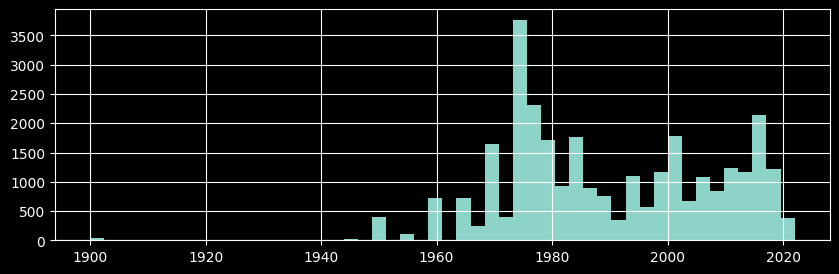

In [169]:
arbres_gre.anneedeplantation.hist(bins=50, figsize=(10,3))
plt.show()

In [170]:
arbres_gre[['long', 'lat']] = arbres_gre['geo_point_2d'].str.split(",", expand = True)

In [171]:
arbres_gre[['long', 'lat']] = arbres_gre[['long', 'lat']].apply(pd.to_numeric)

In [172]:
arbres_gre = arbres_gre.drop(['geo_point_2d'], axis = 1)

#### 1.4. Saving as pickle (4/4)

In [173]:
arbres_pkl = arbres_gre.to_pickle("./arbresgre.pkl")

## Step 2 : Preparing data and evaluating ML models
_________________________________________

In [174]:
arbres_pk = pd.read_pickle('../ML1/arbresgre.pkl')

In [175]:
#Using a funciton that slipts training and test (80/20 ratio)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [176]:
#Applying the ration 80/20 to split our data
#train_set, test_set = split_train_test (arbres_pk, 0.2)
#print(len(train_set))
#print(len(test_set))


In [177]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [178]:
# arbres_pk_id = arbres_pk.reset_index()
# train_set, test_set = split_train_test_by_id(arbres_pk_id, 0.2, "index")
# print(len(train_set))
# print(len(test_set))

##### 2.1 Visualisez l'ensemble de données d'arbres pour comprendre ce qu'il contient

In [194]:
arbres_pk.head(5)

,sous_categorie_desc,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,traitementchenilles,typeimplantationplu,collectivite,hauteurarbre,portarbre,structure,forme,typenature,long,lat
0,Arbre de voirie,Av J O Poterne rond point,5,AR11324,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,Tige,NaN,45.175674,5.749421
1,Arbre de voirie,Av J O Poterne rond point,5,AR27796,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,Tige,NaN,45.175689,5.749450
2,Arbre d'espaces ouverts,Av J O caisse d'épargne,5,AR4323,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,NaN,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,45.175403,5.748483
3,Arbre d'espaces ouverts,Av J O caisse d'épargne,5,AR7132,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,NaN,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,45.175424,5.748558
4,Arbre d'espaces ouverts,R M Riollet cité rouge,5,AR15162,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,NaN,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,45.177608,5.749357


In [195]:
arbres_pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30144 entries, 0 to 31735
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sous_categorie_desc   30144 non-null  object 
 1   code_parent_desc      30144 non-null  object 
 2   adr_secteur           30144 non-null  int64  
 3   bien_reference        30144 non-null  object 
 4   genre_bota            30118 non-null  object 
 5   espece                28753 non-null  object 
 6   variete               4578 non-null   object 
 7   stadededeveloppement  27860 non-null  object 
 8   anneedeplantation     30144 non-null  float64
 9   raisondeplantation    3287 non-null   object 
 10  traitementchenilles   2123 non-null   object 
 11  typeimplantationplu   5181 non-null   object 
 12  collectivite          29948 non-null  object 
 13  hauteurarbre          19995 non-null  object 
 14  portarbre             13931 non-null  object 
 15  structure             29

In [196]:
arbres_pk.describe()

,adr_secteur,anneedeplantation,long,lat
count,30144.000000,30144.000000,30144.000000,30144.000000
mean,3.828722,1990.018644,45.177280,5.727445
std,1.706830,17.992314,0.011999,0.012782
min,1.000000,1900.000000,45.151572,5.697915
25%,2.000000,1975.000000,45.166299,5.717668
50%,4.000000,1987.000000,45.175925,5.729491
75%,5.000000,2006.000000,45.187461,5.737417
max,6.000000,2022.000000,45.224825,5.798704


##### 2.2. Créer un modèle naïf à utiliser comme référence pour les performances

In [205]:
from sklearn.model_selection import train_test_split

X = arbres_pk.drop(['anneedeplantation'], axis=1)
y = arbres_pk['anneedeplantation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
y_pred_naiv = np.zeros_like(y_test) + y_train.median()
y_pred_naiv

array([1987., 1987., 1987., ..., 1987., 1987., 1987.])

In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

msg = f"MODEL NAIF -- MEDIAN\nMSE = {mean_squared_error(y_test, y_pred_naiv):.1f}\nRMSE = {(mean_squared_error(y_test, y_pred_naiv))**0.5:.1f}\nMAE = {mean_absolute_error(y_test, y_pred_naiv):.1f}"
print(msg)


MODEL NAIF -- MEDIAN
MSE = 332.0
RMSE = 18.2
MAE = 15.5


In [180]:
# print(len(train_set))
# print(len(test_set))

24115
6029
